In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [51]:
# Load Dataset & Make a copy for a work. 
 
df = pd.read_csv("water_potability.csv")
# df = main_df.copy()

In [52]:
# Getting top 5 row of the dataset

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [53]:
print(df.shape)

(3276, 10)


In [54]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [55]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [57]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [58]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [62]:
df.dropna(how='all',inplace=True)

In [63]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [64]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [65]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:>

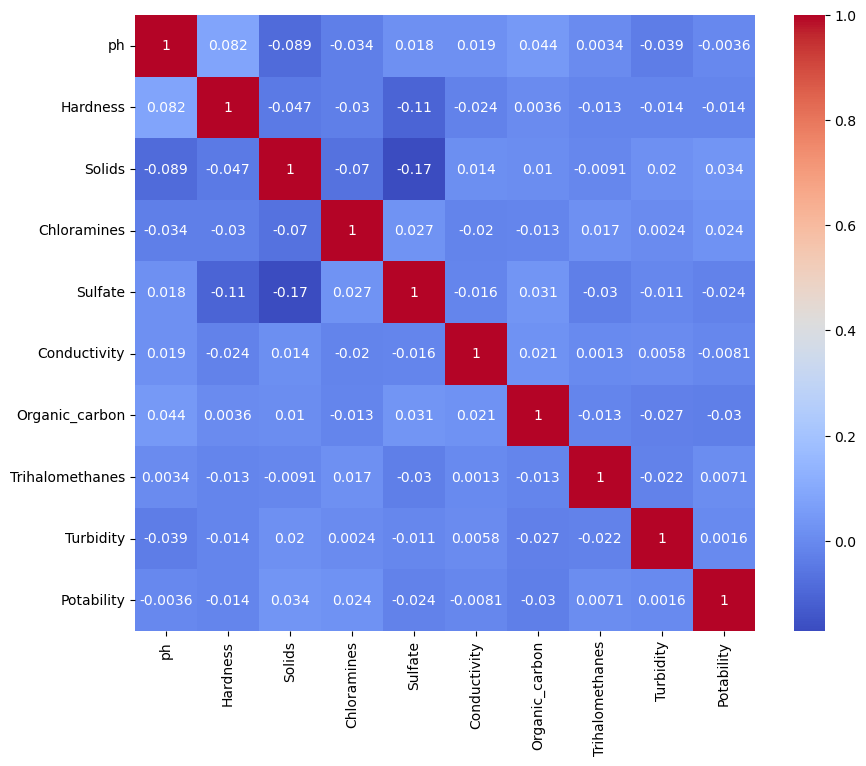

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [67]:
idx1 = df.query('Potability == 1')['ph'][df.ph.isna()].index
df.loc[idx1, 'ph'] = df.query('Potability == 1')['ph'][df.ph.notna()].mean()
idx0 = df.query('Potability == 0')['ph'][df.ph.isna()].index
df.loc[idx0,'ph'] = df.query('Potability==0')['ph'][df.ph.notna()].mean()

idx1 = df.query('Potability == 1')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx1, 'Sulfate'] = df.query('Potability == 1')['Sulfate'][df.Sulfate.notna()].mean()
idx0 = df.query('Potability == 0')['Sulfate'][df.Sulfate.isna()].index
df.loc[idx0,'Sulfate'] = df.query('Potability==0')['Sulfate'][df.Sulfate.notna()].mean()

idx1 = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx1, 'Trihalomethanes'] = df.query('Potability == 1')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()
idx0 = df.query('Potability == 0')['Trihalomethanes'][df.Trihalomethanes.isna()].index
df.loc[idx0,'Trihalomethanes'] = df.query('Potability==0')['Trihalomethanes'][df.Trihalomethanes.notna()].mean()

df.loc[~df.ph.between(6.5, 8.5), 'Potability'] = 0

In [68]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [69]:
X = df.drop(['Potability'], axis = 1).values
y = df['Potability'].values

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # "Support vector classifier" 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

In [79]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

svc = SVC()  

para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

# parameters for SVM
params_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid=params_svc, cv=5)
# C is the penalty parameter of the error term and kernel specifies the type of kernel function used in SVM

In [80]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)


print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)
print("Best Parameters for SVC:", grid_svc.best_params_)

Best parameters for KNN: {'n_neighbors': 26}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 400}
Best parameters for XGBoost: {'n_estimators': 800, 'learning_rate': 0.5}
Best Parameters for SVC: {'C': 1, 'kernel': 'rbf'}


In [81]:
from scipy.stats import uniform, randint

param_dist = {'C': uniform(0.1, 10),
              'kernel': ['rbf'],
              'degree': randint(2, 6),
              'gamma': ['scale', 'auto']}

rs_svc = RandomizedSearchCV(svc, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1)
rs_svc.fit(X_train, y_train)
print("Best parameters for SVC:", rs_svc.best_params_)

print("Best parameters for SVM:", grid_svc.best_params_)

Best parameters for SVC: {'C': 1.4187217081219994, 'degree': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [82]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_leaf=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=16)
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 50, learning_rate=0.8)
xgb = XGBClassifier(n_estimators= 50, learning_rate= 0.5)
svm = SVC(kernel='rbf', random_state = 42)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, random_state=42),
                           n_estimators = 500, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=7,
                                                        min_samples_leaf=2,
                                                        random_state=42),
                  n_estimators=500, random_state=42)

In [83]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb), ('SVC', svm)]

In [84]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.77
K Nearest Neighbours : 0.78
Decision Tree : 0.88
Random Forest : 0.88
AdaBoost : 0.87
Bagging Classifier : 0.88
XGBoost : 0.87
SVC : 0.78


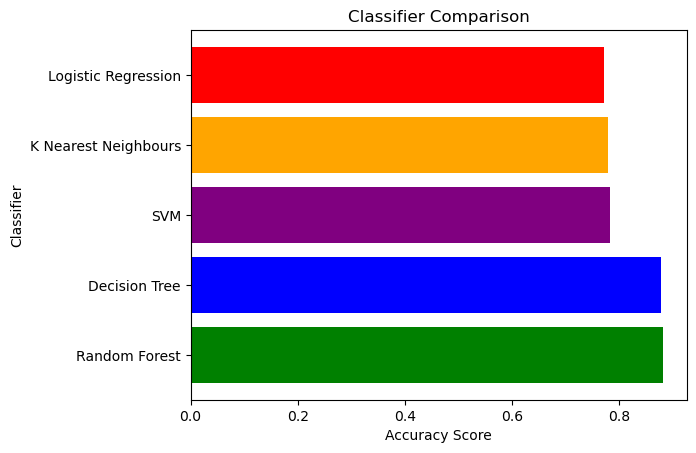

In [85]:
# Define a list of models to compare
models = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
          ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm)]

# Compute the accuracy score for each model
scores = [(name, accuracy_score(y_test, model.predict(X_test))) for name, model in models]

# Sort the models by accuracy score in descending order
scores = sorted(scores, key=lambda x: x[1], reverse=True)

# Define a list of colors for each bar
colors = ['green', 'blue', 'purple', 'orange', 'red']

# Create a bar plot of the models
names, acc_scores = zip(*scores)
plt.barh(names, acc_scores, color=colors)
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Comparison')
plt.show()


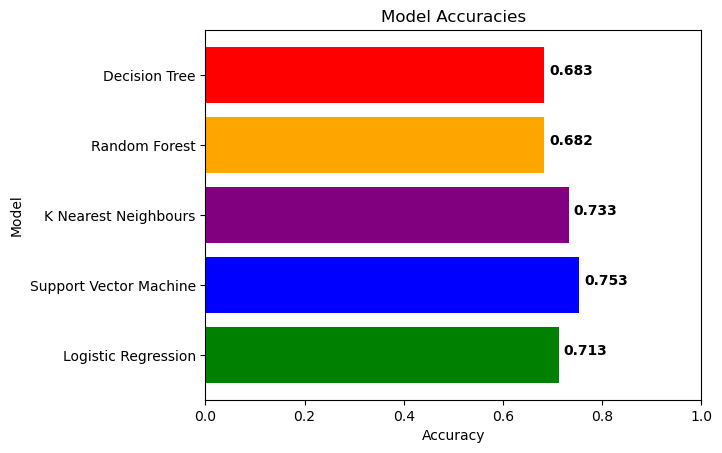

In [97]:
import matplotlib.pyplot as plt

models = [("Logistic Regression", 0.7125),("Support Vector Machine", 0.7535),("K Nearest Neighbours",0.7326),("Random Forest", 0.6825),("Decision Tree",0.6832)]
colors = ['green', 'blue', 'purple', 'orange', 'red']

# Extract the model names and accuracies
names = [model[0] for model in models]
accuracies = [model[1] for model in models]

# Create a horizontal bar chart
plt.barh(names, accuracies, color=colors)

# Set the x-axis limit to 1
plt.xlim(0, 1)

# Add labels to the bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight='bold')

# Add a title and axis labels
plt.title("Model Accuracies")
plt.xlabel("Accuracy")
plt.ylabel("Model")

# Display the chart
plt.show()


<AxesSubplot:>

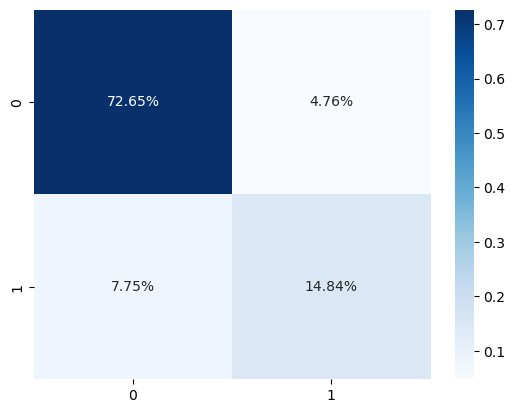

In [90]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix 
y_pred_lr= rs_xgb.predict(X_test)

cm7 = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [38]:
import pickle
filename = 'model.pkl'
pickle.dump(grid_svc, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate random data for example
y_true = [0, 1, 1, 0, 0, 1, 1, 1, 0, 1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
